In [137]:
# 정리
# 의외로 MZ 세대가 MZ 아닌 세대보다 평균매출금액(카드사용금액?)이 더 크다.
# 평균매출건수 역시 MZ 세대가 MZ 아닌 세대보다 더 많다.
# 즉, MZ 세대는 평균 카드 사용건수와 평균 사용금액이 다른세대에 비해 많다.

# MZ 세대 여부와 상관없이, 카드사용품목은 세대별 차이가 거의 없다.
# e상품/서비스, 여가/스포츠, 식품 순이다.

# 가구생애주기는 MZ세대는 신혼영유아가구, 1인가구가 많고,
# MZ아님세대는 초중고자녀가구, 성인자녀가구가 많다.
# -> MZ 세대 중 잠재적인 신혼영유아 가구 추론하여 관련 서비스 제공.
# -> 1인가구의 특징은 무엇이 있을지 추가 분석 수행하여 Insight 도출.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format

#plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


'''
font_path = 'c:\\windows\\fonts\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
'''

"\nfont_path = 'c:\\windows\\fonts\\malgun.ttf'\nfont_name = font_manager.FontProperties(fname=font_path).get_name()\nrc('font', family=font_name)\n"

In [2]:
bc = pd.read_csv('C:\\data\\fin\\금융보안원_경진대회_데이터(최종제출).csv')
bc

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [4]:
bc.isnull().sum()

기준년월          0
품목대분류코드       0
품목대분류명        0
품목중분류코드       0
품목중분류명        0
성별            0
연령            0
가구생애주기        0
고객소재지_광역시도    0
고객소재지_시군구     0
고객소재지_읍면동     0
매출금액          0
매출건수          0
dtype: int64

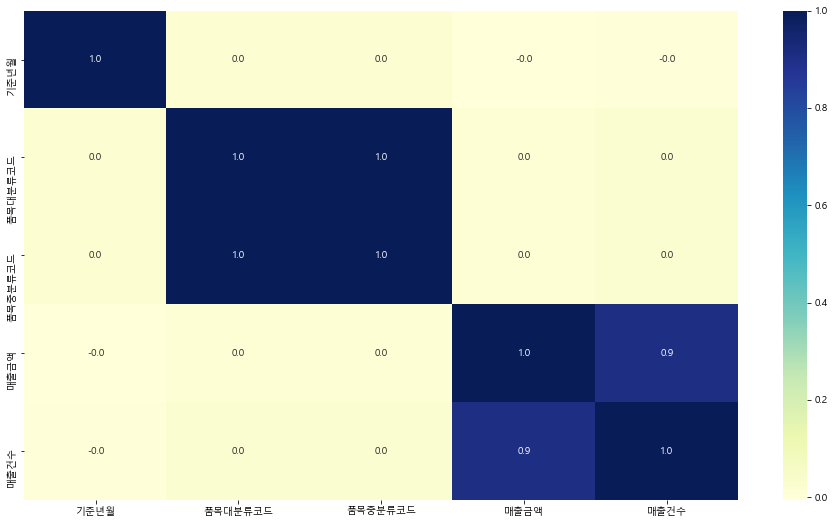

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(bc.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [6]:
bc[bc.columns[bc.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
품목대분류명,519297,13,e상품/서비스,76052
품목중분류명,519297,50,o2o서비스,42064
성별,519297,2,여성,330244
연령,519297,6,40대,159877
가구생애주기,519297,5,신혼영유아가구,178693
고객소재지_광역시도,519297,3,서울특별시,306122
고객소재지_시군구,519297,38,수원시,38891
고객소재지_읍면동,519297,685,논현동,4251


In [7]:
#성별
#연령
#가구생애주기
#고객소재지_광역시도
#품목대분류명

In [8]:
# 1. object encoding
#2. 매출금액을 label 로 해서 분석 (x축은 나이, y축은 소득?)
#3. MZ 세대를 1, 아닌 세대를 0 으로 두고 clustering?

In [9]:
bc_e = bc.copy()

In [10]:
bc_e['성별'].unique()

array(['여성', '남성'], dtype=object)

In [11]:
bc_e['성별'].replace({'여성':0, '남성':1}, inplace=True)

In [12]:
bc_e['연령'].unique()

array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

In [13]:
bc_e['연령'] = bc_e['연령'].map(lambda x: 1 if x in ['20세 미만', '20대', '30대'] else 0)

In [14]:
bc_e['가구생애주기'].unique()

array(['초중고자녀가구', '신혼영유아가구', '성인자녀가구', '1인가구', '노인가구'], dtype=object)

In [15]:
bc.groupby('가구생애주기')['연령'].value_counts()

가구생애주기   연령    
1인가구     20대        85079
         30대        26526
         20세 미만      5902
노인가구     60대 이상     27763
성인자녀가구   50대        68074
         40대        14687
신혼영유아가구  30대       119656
         40대        45567
         20대        13446
         50대           24
초중고자녀가구  40대        99623
         50대         6784
         30대         6166
Name: 연령, dtype: int64

In [16]:
bc_e['가구생애주기'] = bc_e['가구생애주기'].map(lambda x:1 if x in ['1인가구', '신혼영유아가구'] else 0)

In [17]:
bc_e['고객소재지_광역시도'].replace({'서울특별시':0, '경기도':1, '인천광역시':2}, inplace=True)

In [18]:
print(bc_e['품목대분류코드'].value_counts())
print('\n')
print(bc_e['품목대분류명'].value_counts())

21    76052
20    67231
16    64995
19    46009
10    44431
11    40512
17    39284
12    38289
15    33448
18    23750
14    20053
13    12654
99    12589
Name: 품목대분류코드, dtype: int64


e상품/서비스    76052
여가/스포츠     67231
식품         64995
출산/육아      46009
의류         44431
패션잡화       40512
생활         39284
뷰티         38289
전자         33448
건강         23750
인테리어       20053
가구         12654
기타         12589
Name: 품목대분류명, dtype: int64


In [19]:
bc_e.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,0,0,0,0,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,0,1,1,0,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,0,1,1,0,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,0,1,1,0,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,0,1,1,0,구로구,궁동,1656740,58


In [20]:
df = bc_e[['품목대분류코드', '성별', '연령', '가구생애주기', '고객소재지_광역시도', '매출금액', '매출건수']]

In [21]:
df
#품목대분류코드(위참조)
#성별: 0(여자), 1(남자)
#연령: 0(MZ 세대 아님), 1(MZ 세대) / MZ: ~ 30대까지
#가구생애주기: 0(MZ 세대 아님), 1(MZ 세대)
#고객소재지_광역시도: 0(서울), 1(경기), 2(인천)

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,매출금액,매출건수
0,10,0,0,0,0,782521,13
1,21,0,1,1,0,963789,29
2,19,0,1,1,0,924309,46
3,21,0,1,1,0,1089360,54
4,17,0,1,1,0,1656740,58
...,...,...,...,...,...,...,...
519292,20,0,1,1,0,1411368,7
519293,21,1,1,1,0,1386040,63
519294,11,0,1,1,0,390818,7
519295,16,1,0,0,0,327592,7


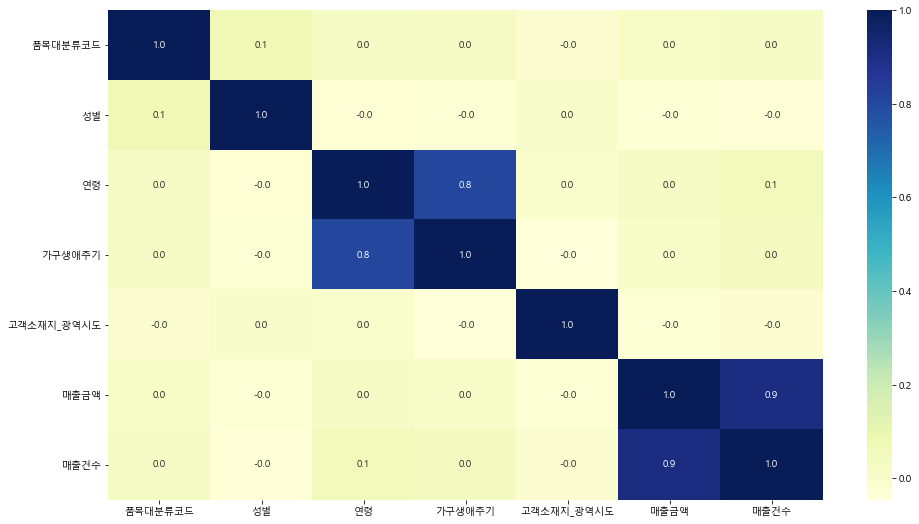

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

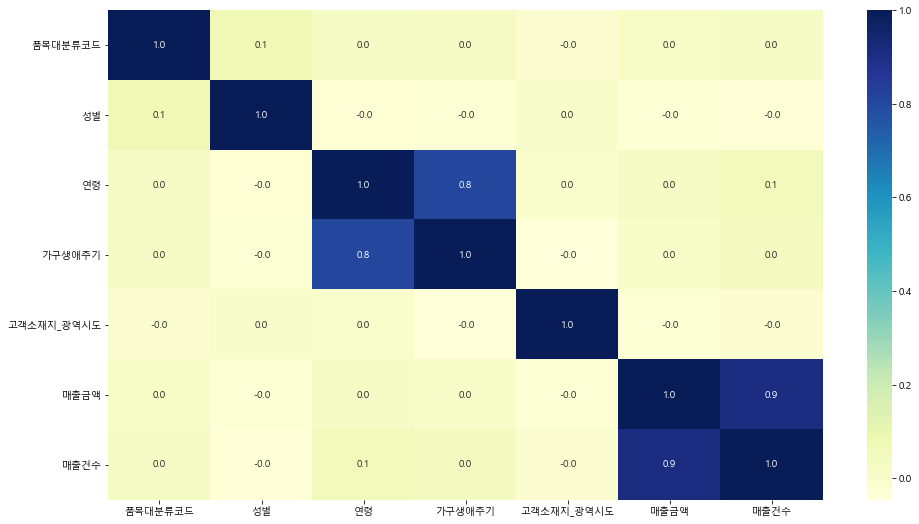

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(scaled_df.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

--------------- 성별 비율 -----------------
0   0.63594
1   0.36406
Name: 성별, dtype: float64
------------------------------------------


([<matplotlib.axis.XTick at 0x2c2047161f0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

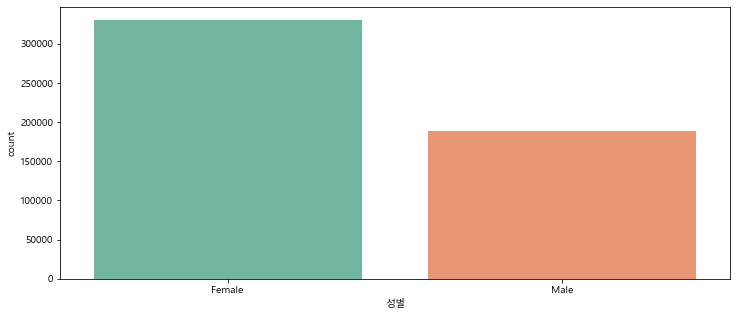

In [25]:
print('--------------- 성별 비율 -----------------')
print(df['성별'].value_counts() / df.shape[0])
print('------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(df['성별'], palette='Set2')
plt.xticks([0,1], ['Female', 'Male'])

--------------- MZ세대 성별 비율 -----------------
0   0.64956
1   0.35044
Name: 성별, dtype: float64
-------------------------------------------------


([<matplotlib.axis.XTick at 0x2c20fc38790>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

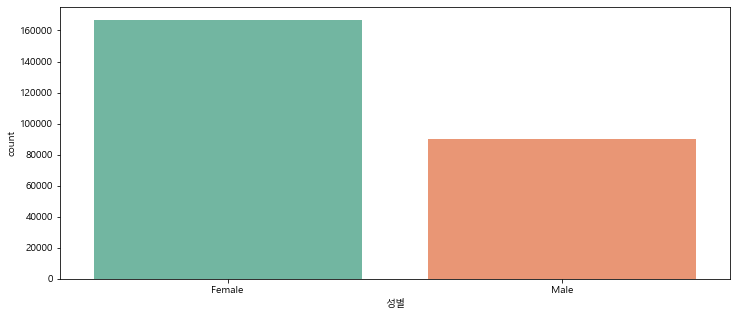

In [134]:
print('--------------- MZ세대 성별 비율 -----------------')
print(df['성별'][df['연령'] == 1].value_counts() / df['성별'][df['연령'] == 1].shape[0])
print('-------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(df['성별'][df['연령'] == 1], palette='Set2')
plt.xticks([0,1], ['Female', 'Male'])

------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
0   0.50553
1   0.49447
Name: 연령, dtype: float64
-----------------------------------------------------------


([<matplotlib.axis.XTick at 0x2c20ae98eb0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

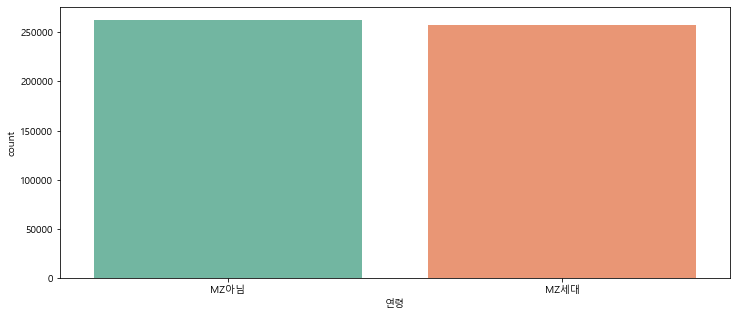

In [135]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(df['연령'].value_counts() / df.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(df['연령'], palette='Set2')
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [28]:
grouped = df.groupby(['연령']).mean()
grouped.reset_index(inplace=True)

In [29]:
grouped

,연령,품목대분류코드,성별,가구생애주기,고객소재지_광역시도,매출금액,매출건수
0,0,17.96443,0.37738,0.17367,0.54837,2022031.20486,40.07890
1,1,18.60679,0.35044,0.97599,0.55070,2358608.10670,58.03757


--------------- 세대 별 평균 매출금액 -----------------
           매출금액
0 2022031.20486
1 2358608.10670
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x2c210a44d30>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

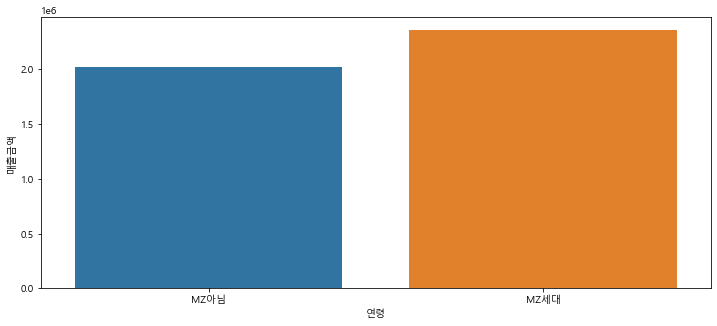

In [136]:
print('--------------- 세대 별 평균 매출금액 -----------------')
print(grouped[['매출금액']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령', y='매출금액', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [31]:
# 의외로 MZ 세대가 MZ 아닌 세대보다 평균매출금액(카드사용금액?)이 더 크다.

--------------- 연령 비율 -----------------
      매출건수
0 40.07890
1 58.03757
------------------------------------------


([<matplotlib.axis.XTick at 0x2c2033e6370>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

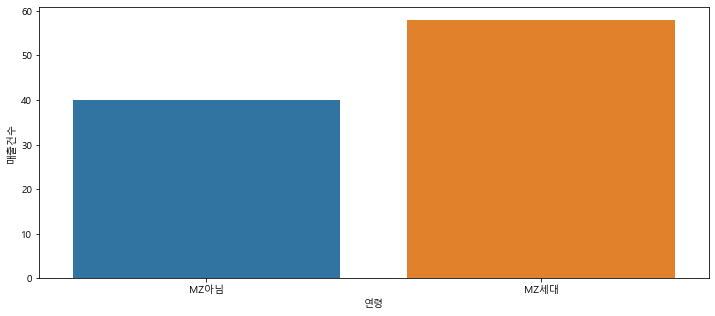

In [32]:
print('--------------- 연령 비율 -----------------')
print(grouped[['매출건수']])
print('------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령', y='매출건수', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [33]:
# 평균매출건수 역시 MZ 세대가 MZ 아닌 세대보다 더 많다.
# 즉, MZ 세대는 평균 카드 사용건수와 평균 사용금액이 다른세대에 비해 많다.

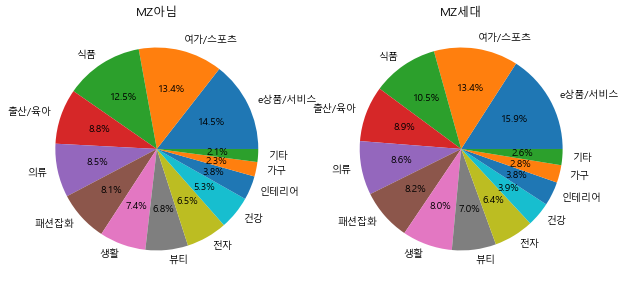

In [34]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목대분류명'][bc_e['연령']==0].value_counts(), labels=bc_e.품목대분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목대분류명'][bc_e['연령']==1].value_counts(), labels=bc_e.품목대분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ아님')
ax2.set_title('MZ세대')

plt.show()

In [35]:
# MZ 세대 여부와 상관없이, 카드사용품목은 세대별 차이가 거의 없다.
# e상품/서비스, 여가/스포츠, 식품 순이다.

In [36]:
bc_e.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,0,0,0,0,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,0,1,1,0,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,0,1,1,0,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,0,1,1,0,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,0,1,1,0,구로구,궁동,1656740,58


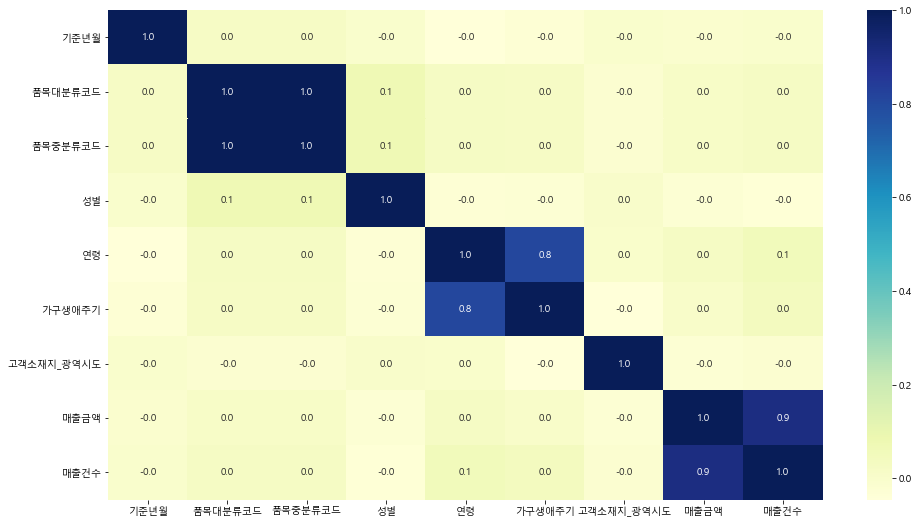

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(bc_e.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [38]:
bc_age = bc.copy()
bc_age['연령'] = bc_age['연령'].map(lambda x: 'MZ세대' if x in ['20세 미만', '20대', '30대'] else 'MZ아님')
bc_age.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,MZ아님,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,MZ세대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,MZ세대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,MZ세대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,MZ세대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [39]:
bc_age_grouped = bc_age.groupby('연령')

In [40]:
a = pd.DataFrame(bc_age_grouped['가구생애주기'].value_counts())
a.columns = ['count']
a.reset_index(inplace=True)
a

,연령,가구생애주기,count
0,MZ세대,신혼영유아가구,133102
1,MZ세대,1인가구,117507
2,MZ세대,초중고자녀가구,6166
3,MZ아님,초중고자녀가구,106407
4,MZ아님,성인자녀가구,82761
5,MZ아님,신혼영유아가구,45591
6,MZ아님,노인가구,27763


<AxesSubplot:xlabel='연령', ylabel='count'>

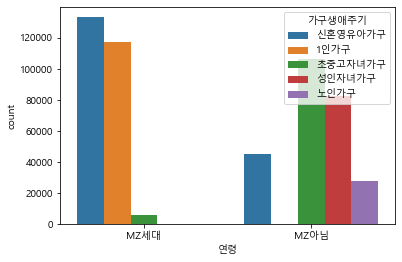

In [41]:
sns.barplot(x='연령', y='count', hue='가구생애주기', data=a)

In [42]:
# 가구생애주기는 MZ세대는 신혼영유아가구, 1인가구가 많고,
# MZ아님세대는 초중고자녀가구, 성인자녀가구가 많다.

In [43]:
b = pd.DataFrame(bc_age_grouped['고객소재지_광역시도'].value_counts())
b.columns = ['count']
b.reset_index(inplace=True)
b

,연령,고객소재지_광역시도,count
0,MZ세대,서울특별시,151724
1,MZ세대,경기도,68697
2,MZ세대,인천광역시,36354
3,MZ아님,서울특별시,154398
4,MZ아님,경기도,72288
5,MZ아님,인천광역시,35836


<AxesSubplot:xlabel='연령', ylabel='count'>

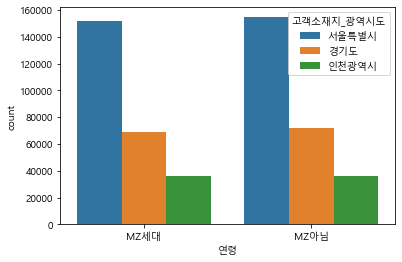

In [44]:
sns.barplot(x='연령', y='count', hue='고객소재지_광역시도', data=b)

In [45]:
c = pd.DataFrame(bc_age_grouped['고객소재지_시군구'].value_counts())
c.columns = ['count']
c.reset_index(inplace=True)
c

,연령,고객소재지_시군구,count
0,MZ세대,수원시,20943
1,MZ세대,용인시,16438
2,MZ세대,성남시,15753
3,MZ세대,고양시,15563
4,MZ세대,마포구,9980
...,...,...,...
71,MZ아님,종로구,3040
72,MZ아님,금천구,2861
73,MZ아님,동구,857
74,MZ아님,강화군,235


In [46]:
d = c.sort_values(by='count', ascending=False).groupby('연령').head(5)
d

,연령,고객소재지_시군구,count
0,MZ세대,수원시,20943
38,MZ아님,용인시,18654
39,MZ아님,고양시,18249
40,MZ아님,수원시,17948
41,MZ아님,성남시,17437
1,MZ세대,용인시,16438
2,MZ세대,성남시,15753
3,MZ세대,고양시,15563
42,MZ아님,강남구,11502
4,MZ세대,마포구,9980


<AxesSubplot:xlabel='연령', ylabel='count'>

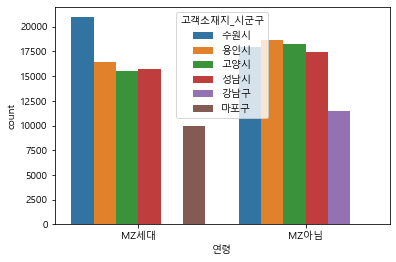

In [47]:
sns.barplot(x='연령', y='count', hue='고객소재지_시군구', data=d)

In [48]:
# 세대구분없이 서울에서 가장 많이 살고 있다.
# 구체적으로, MZ 세대는 다른시보다 수원시에 조금 더 많이 사는 편이나,
# MZ 아님 세대와 Top 5 가 거의 같아 유의미한 특징을 발견하기는 어렵다.

In [49]:
bc.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [50]:
bc_age.sort_values(by='매출금액', ascending=False).head(20)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
322635,202009,21,e상품/서비스,2111,e머니/상품권,남성,MZ아님,초중고자녀가구,인천광역시,남동구,만수동,591848842,932
57975,201903,21,e상품/서비스,2111,e머니/상품권,남성,MZ아님,초중고자녀가구,서울특별시,송파구,잠실동,404782343,784
318280,202009,15,전자,1511,디지털,남성,MZ아님,초중고자녀가구,서울특별시,관악구,신림동,390386807,491
443768,202103,21,e상품/서비스,2110,o2o서비스,여성,MZ세대,신혼영유아가구,서울특별시,강서구,화곡동,360045831,10478
3619,201903,20,여가/스포츠,2014,취미/특기,남성,MZ아님,초중고자녀가구,인천광역시,연수구,송도동,333716989,5036
499061,202103,21,e상품/서비스,2110,o2o서비스,여성,MZ세대,신혼영유아가구,서울특별시,관악구,봉천동,318214384,9321
116002,201909,21,e상품/서비스,2111,e머니/상품권,남성,MZ아님,초중고자녀가구,서울특별시,송파구,잠실동,314773250,505
458500,202103,21,e상품/서비스,2110,o2o서비스,여성,MZ세대,1인가구,서울특별시,관악구,신림동,313901162,10079
380172,202009,21,e상품/서비스,2111,e머니/상품권,여성,MZ세대,신혼영유아가구,서울특별시,강남구,자곡동,309509270,437
345221,202009,21,e상품/서비스,2111,e머니/상품권,남성,MZ아님,초중고자녀가구,서울특별시,강남구,자곡동,307890826,440


In [51]:
bc_age.sort_values(by='매출금액', ascending=True).head(20)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
197038,202003,21,e상품/서비스,2111,e머니/상품권,남성,MZ세대,1인가구,서울특별시,구로구,신도림동,1490,6
208192,202003,21,e상품/서비스,2112,모바일상품,남성,MZ세대,1인가구,서울특별시,영등포구,신길동,1500,4
264204,202003,99,기타,9912,기타교육비,여성,MZ세대,1인가구,서울특별시,종로구,명륜2가,2500,4
417548,202103,99,기타,9911,기타결제,남성,MZ아님,신혼영유아가구,경기도,성남시,이매동,2578,5
157081,201909,99,기타,9912,기타교육비,남성,MZ세대,1인가구,서울특별시,종로구,명륜3가,2585,5
221614,202003,11,패션잡화,1111,신발,남성,MZ세대,신혼영유아가구,경기도,수원시,서둔동,2800,4
260558,202003,99,기타,9912,기타교육비,여성,MZ세대,1인가구,서울특별시,영등포구,영등포동7가,3000,4
200350,202003,99,기타,9911,기타결제,남성,MZ아님,성인자녀가구,서울특별시,중랑구,신내동,3100,4
301979,202003,11,패션잡화,1111,신발,남성,MZ아님,초중고자녀가구,서울특별시,강남구,수서동,3500,5
263861,202003,99,기타,9912,기타교육비,여성,MZ세대,1인가구,경기도,수원시,인계동,3500,4


In [52]:
df.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,매출금액,매출건수
0,10,0,0,0,0,782521,13
1,21,0,1,1,0,963789,29
2,19,0,1,1,0,924309,46
3,21,0,1,1,0,1089360,54
4,17,0,1,1,0,1656740,58


In [53]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,매출금액,매출건수
0,-0.62564,-0.75661,-0.98899,-1.15225,-0.75800,-0.21837,-0.21945
1,0.20532,-0.75661,1.01113,0.86787,-0.75800,-0.19022,-0.12181
2,0.05424,-0.75661,1.01113,0.86787,-0.75800,-0.19635,-0.01806
3,0.20532,-0.75661,1.01113,0.86787,-0.75800,-0.17071,0.03077
4,-0.09685,-0.75661,1.01113,0.86787,-0.75800,-0.08259,0.05518


In [54]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [55]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)
reduced_df.shape

(519297, 2)

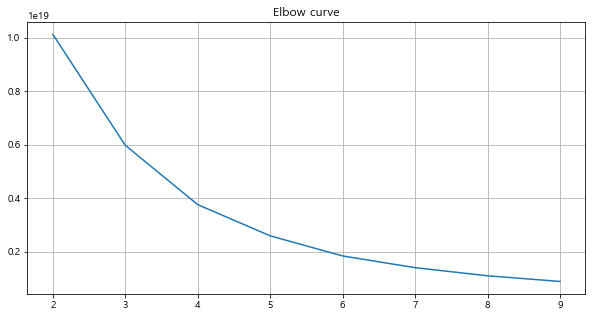

In [56]:
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [57]:
from sklearn import cluster

kmeans = cluster.KMeans(init='random', n_clusters=10, n_init=10)

kmeans.fit(df)

cluster_label = kmeans.labels_
df['cluster'] = cluster_label

df.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,매출금액,매출건수,cluster
0,10,0,0,0,0,782521,13,4
1,21,0,1,1,0,963789,29,4
2,19,0,1,1,0,924309,46,4
3,21,0,1,1,0,1089360,54,4
4,17,0,1,1,0,1656740,58,4


In [58]:
df_kmeans_grouped = df.groupby('연령')
df_kmeans_grouped['cluster'].value_counts()

연령  cluster
0   4          190949
    1           48363
    7           14910
    8            5169
    0            1874
    6             744
    2             334
    3             125
    5              42
    9              12
1   4          183560
    1           46488
    7           16356
    8            5920
    0            2331
    6            1140
    2             571
    3             282
    5             100
    9              27
Name: cluster, dtype: int64

In [59]:
e = pd.DataFrame(df_kmeans_grouped['cluster'].value_counts())
e.columns = ['count']
e.reset_index(inplace=True)
e

,연령,cluster,count
0,0,4,190949
1,0,1,48363
2,0,7,14910
3,0,8,5169
4,0,0,1874
5,0,6,744
6,0,2,334
7,0,3,125
8,0,5,42
9,0,9,12


<AxesSubplot:xlabel='연령', ylabel='count'>

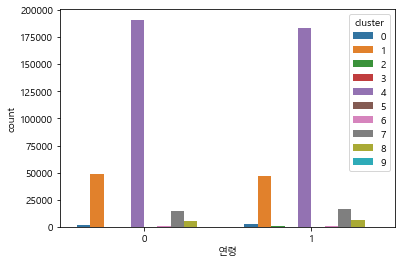

In [60]:
sns.barplot(x='연령', y='count', hue='cluster', data=e)

In [61]:
# 정답없이 분류하는 k-means 모델을 통해 MZ세대(1) 와 MZ아닌세대(0) 의
# 특징적인 cluster 가 있는지 확인해봤지만, 두 세대간 구별되는 차이 없음.

In [142]:
kmeans.feature_importances_

AttributeError: 'KMeans' object has no attribute 'feature_importances_'

In [62]:
df = bc_e[['품목대분류코드', '성별', '연령', '가구생애주기', '고객소재지_광역시도', '매출금액', '매출건수']]
df

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,매출금액,매출건수
0,10,0,0,0,0,782521,13
1,21,0,1,1,0,963789,29
2,19,0,1,1,0,924309,46
3,21,0,1,1,0,1089360,54
4,17,0,1,1,0,1656740,58
...,...,...,...,...,...,...,...
519292,20,0,1,1,0,1411368,7
519293,21,1,1,1,0,1386040,63
519294,11,0,1,1,0,390818,7
519295,16,1,0,0,0,327592,7


In [125]:
x = df[['품목대분류코드', '성별', '고객소재지_광역시도', '매출금액', '매출건수']]
y = df['연령']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(467367, 5)
(51930, 5)


In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)

y_hat = knn.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[19168  7049]
 [16179  9534]]
              precision    recall  f1-score   support

           0       0.54      0.73      0.62     26217
           1       0.57      0.37      0.45     25713

    accuracy                           0.55     51930
   macro avg       0.56      0.55      0.54     51930
weighted avg       0.56      0.55      0.54     51930



In [65]:
# 정답을 MZ세대(1)와 MZ아닌세대(0) 으로 주고, 정답 컬럼을 제외한
# 나머지 컬럼 data 로 MZ 세대를 구분할 수 있는지 KNN 모델을 돌려본 결과,
# 정확도 0.86 으로 구분해 낼 수 있었다.
# -> 하지만, 가구생애주기 column 을 삭제하면, 정확도가 0.55 로 떨어진다.
# 정확도 0.5 는 반은 맞고, 반은 틀린 것. 즉, '가구생애주기' 외에는 MZ 구별 X

In [127]:
x = df.loc[0:1000, ['품목대분류코드', '성별', '고객소재지_광역시도', '매출금액', '매출건수']]
y = df.loc[0:1000, '연령']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(900, 5)
(101, 5)


In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print((pred == y_test).mean())

0.5841584158415841


In [141]:
['품목대분류코드', '성별', '고객소재지_광역시도', '매출금액', '매출건수']

['품목대분류코드', '성별', '고객소재지_광역시도', '매출금액', '매출건수']

In [138]:
model.feature_importances_

array([0.15449682, 0.05095425, 0.0479418 , 0.49430737, 0.25229976])

In [129]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [130]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [131]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot',
                class_names='10',
                feature_names=['품목대분류코드', '성별', '고객소재지_광역시도', '매출금액', '매출건수'],
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [132]:
import graphviz
with open('tree.dot', 'rt', encoding='UTF8') as file_reader:
    dot_graph = file_reader.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree', , format='svg') # svg로 저장

'tree.png.pdf'

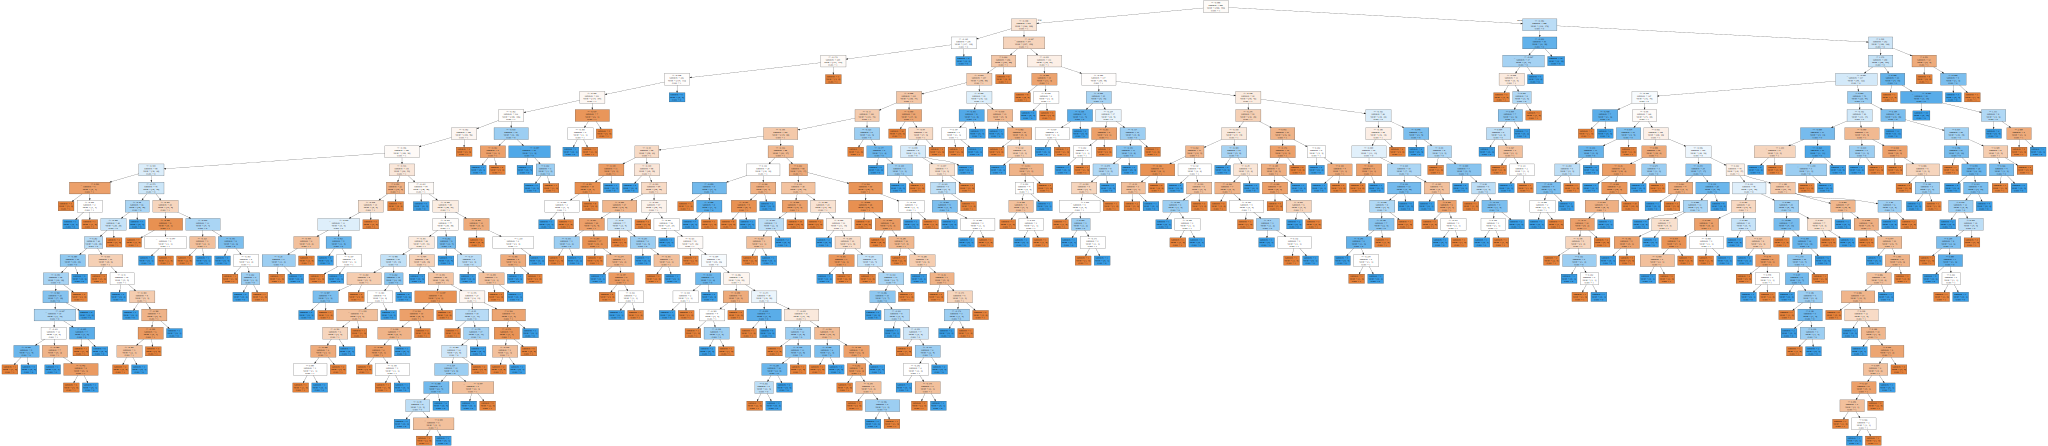

In [133]:
import graphviz

with open('tree.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)